In [1]:
from google.colab import files
uploaded = files.upload()

Saving Customers.csv to Customers.csv


In [2]:
import pandas as pd
customers = pd.read_csv("Customers.csv")

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Transactions.csv to Transactions.csv


In [4]:
import pandas as pd
customers = pd.read_csv("Transactions.csv")

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Products.csv to Products.csv


In [6]:
import pandas as pd
customers = pd.read_csv("Products.csv")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [9]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [10]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [11]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


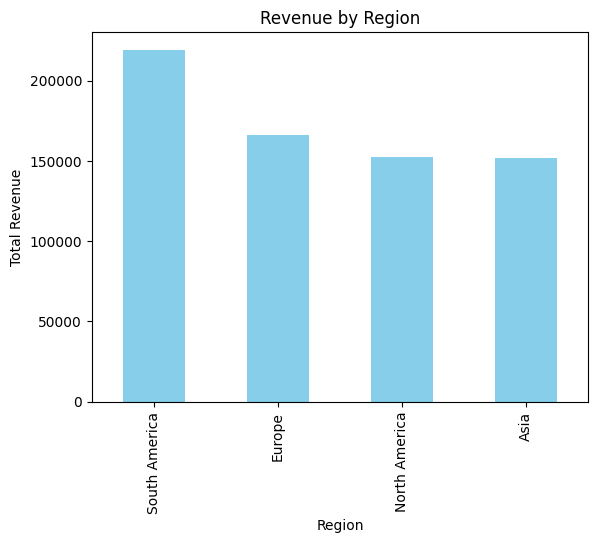

In [12]:
region_revenue = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print(region_revenue)

# Plot revenue by region
region_revenue.plot(kind='bar', title="Revenue by Region", color='skyblue')
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


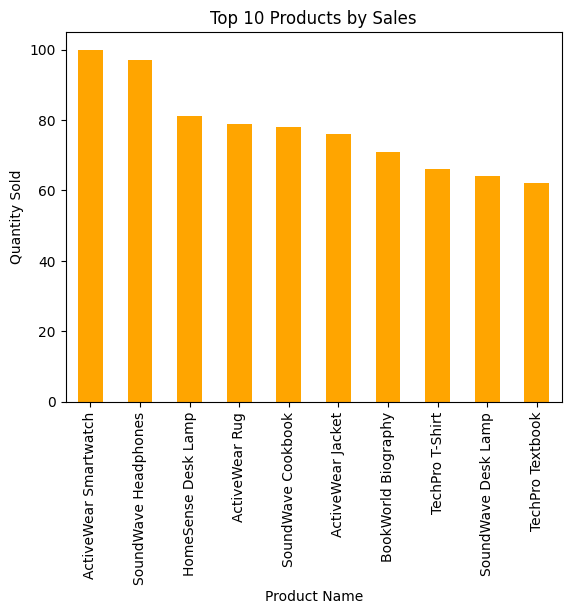

In [13]:
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print(top_products)

# Plot top products by sales
top_products.plot(kind='bar', title="Top 10 Products by Sales", color='orange')
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.show()

TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: TransactionID, dtype: int64


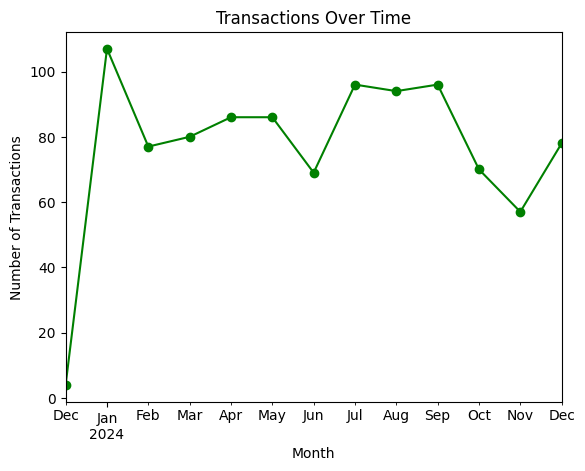

In [14]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
transactions_over_time = merged_data.groupby(merged_data['TransactionDate'].dt.to_period("M"))["TransactionID"].count()
print(transactions_over_time)

# Plot transactions over time
transactions_over_time.plot(kind='line', title="Transactions Over Time", marker='o', color='green')
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

SignupDate
2022    64
2023    57
2024    79
Name: CustomerID, dtype: int64


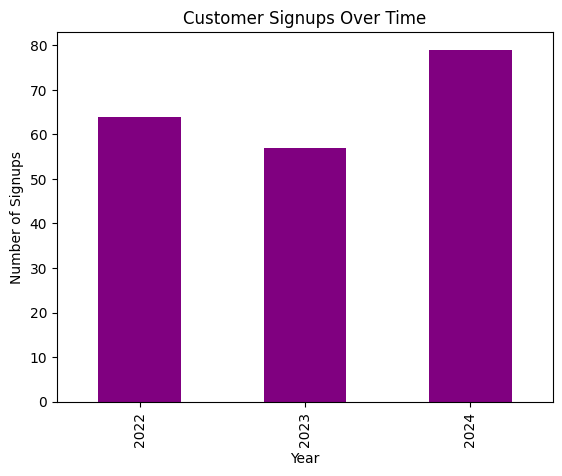

In [15]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers.groupby(customers['SignupDate'].dt.year)["CustomerID"].count()
print(signup_trends)

# Plot customer signups over the years
signup_trends.plot(kind='bar', title="Customer Signups Over Time", color='purple')
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


<Axes: xlabel='Category', ylabel='TotalValue'>

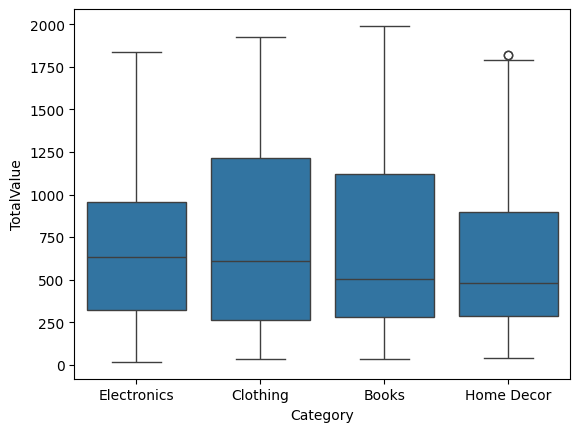

In [24]:
# Check the column names of your merged DataFrame to see if 'Price' exists or if it has a different name.
print(merged_data.columns)

# Output:
# Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
#        'Quantity', 'TotalValue', 'Gender', 'Age', 'City', 'Region',
#        'SignupDate', 'ProductName', 'Category'],
#       dtype='object')

# The column is named 'TotalValue', not 'product_price'. Update the code to use the correct column name:
average_price = merged_data["TotalValue"].mean()
top_selling_prices = merged_data[merged_data["ProductID"].isin(top_products.index)]["TotalValue"].mean()  # Also, using top_products.index for product IDs
sns.boxplot(x=merged_data["Category"], y=merged_data["TotalValue"])